# SARSA for the Windy Gridworld

Here we implement SARSA for the simple Windy Gridworld example of Sutton and Barto (2018), p. 130.

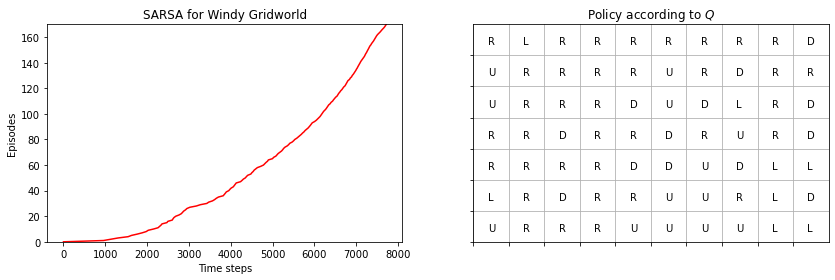

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MDP:
# - S is the set of pairs (r, c) with rows r in 0..6 and cols c in 0..9
# - A is the set 0..3 for up, down, right, left
# - gamma is 1 (undiscounted episodic task)
# - Psa is deterministic motion on the grid with a wind function, implemented by env(s, a)
# - R is -1 everywhere except the goal (7, 3)
# - Start state is always (3, 0)

gamma = 1
s_initial = (3, 0)
s_terminal = (3, 7)

def reward(s):
    if s == s_terminal:
        return 0
    else:
        return -1

def env(s, a):
    srow = s[0]
    scol = s[1]
    
    wind = 0    
    if scol == 3 or scol == 4 or scol == 5 or scol == 8:
        wind = 1
    elif scol == 6 or scol == 7:
        wind = 2
        
    if a == 0:
        srow += 1
    elif a == 1:
        srow -= 1
    elif a == 2:
        scol += 1
    elif a == 3:
        scol -= 1
    srow += wind
    
    if srow > 6:
        srow = 6
    elif srow < 0:
        srow = 0
    if scol < 0:
        scol = 0
    elif scol > 9:
        scol = 9

    return (srow, scol), reward((srow, scol))

# Policy based on Q: epsilon-greedy

def epsilon_greedy(Q, s, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s])

# Inputs: alpha, epsilon

alpha = 0.5
epsilon = 0.1

# Initialize Q to 0 for all states, actions

Q = {}
n_actions = 4
for srow in range(7):
    for scol in range(10):
        s = (srow, scol)
        Q[s] = [0] * n_actions

# For each episode

n_episodes = 170
t = 0
episode_time_steps = [0]
for episode in range(n_episodes):
    s = s_initial
    a = epsilon_greedy(Q, s, epsilon)
    # t = 0
    while s != s_terminal:
        sprime, r = env(s, a)
        aprime = epsilon_greedy(Q, sprime, epsilon)
        Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[sprime][aprime] - Q[s][a])
        t += 1
        s = sprime
        a = aprime
    episode_time_steps.append(t)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(episode_time_steps, range(n_episodes+1), 'r-')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.ylim(0, 170)
plt.title('SARSA for Windy Gridworld')
ax = plt.subplot(1, 2, 2)
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 7, 1))
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
plt.grid()
action_names = ['U', 'D', 'R', 'L']
for srow in range(7):
    for scol in range(10):
        s = (srow, scol)
        a = np.argmax(Q[s])
        plt.text(scol+0.4, srow+0.35, action_names[a])
plt.title('Policy according to $Q$')
plt.show()